In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# set default figure size
plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
pd.options.display.max_columns = None

In [3]:
# Import data
df = pd.read_csv('data/Kickstarter_preprocessed.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 76 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         209222 non-null  int64  
 1   backers_count                      209222 non-null  int64  
 2   blurb                              209214 non-null  object 
 3   converted_pledged_amount           209222 non-null  int64  
 4   country                            209222 non-null  object 
 5   created_at                         209222 non-null  int64  
 6   currency                           209222 non-null  object 
 7   currency_symbol                    209222 non-null  object 
 8   currency_trailing_code             209222 non-null  bool   
 9   current_currency                   209222 non-null  object 
 10  deadline                           209222 non-null  int64  
 11  disable_communication              2092

In [5]:
# delete first column
df.drop(['Unnamed: 0'],axis=1,inplace=True);

In [6]:
# rename some columns
df.rename(columns={'name_category':'category_sub','slug_category':'category'},inplace=True)

In [7]:
# split text in column category, keep only left part of string
df.category = df.category.apply(lambda x: x.split('/')[0])

In [8]:
# change to lower case string
df.category_sub = df.category_sub.str.lower()

In [9]:
# convert description (blurp) into integer --> number of words
df.blurb = df['blurb'].apply(lambda x: len(str(x).split()));

## Change unixtime into human readible time

In [10]:
# create function for format change
# we could also use lambda x: datetime.utcfromtimestamp(x)

def chg_date(x):
    return datetime.utcfromtimestamp(x)

In [11]:
# apply on dataframe

time_col = ['created_at','deadline','launched_at']
df[time_col] = df[time_col].applymap(chg_date)

In [12]:
# create new feature called duration
df['duration'] = df.deadline - df.launched_at

In [13]:
# calculate usd_goal
df['usd_goal'] = df.goal * df.static_usd_rate

## Show target, count classes

Let's take a look on our target.

In [14]:
df.state.value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

We have found four different categories:
- successful
- failed
- live
- suspended

We are restricting the analysis on projects which have been finished, therefore we delete all rows of the categories **canceled**, **live** and **suspended**.

In [15]:
df = df[df.state.isin(['successful','failed'])]

In [16]:
df.state.value_counts()

successful    117465
failed         75199
Name: state, dtype: int64

## Target & Features

In [17]:
# define target
target = ['state']

In [18]:
# define features
features = ['blurb','category','category_sub',\
            'duration','currency','usd_goal','country',\
            'localized_name','type','staff_pick']

In [19]:
df[features].head()

,blurb,category,category_sub,duration,currency,usd_goal,country,localized_name,type,staff_pick
0,20,games,live games,60 days,USD,5000.0,US,Douglas,Town,False
1,15,film & video,drama,30 days,USD,6000.0,US,Douglas,Town,False
2,19,film & video,experimental,30 days,USD,10000.0,US,San Francisco,Town,False
3,25,journalism,journalism,30 days,USD,8000.0,US,San Francisco,Town,False
4,11,games,mobile games,30 days,USD,2000.0,US,Jacksonville,Town,False


In [20]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   blurb           192664 non-null  int64          
 1   category        192664 non-null  object         
 2   category_sub    192664 non-null  object         
 3   duration        192664 non-null  timedelta64[ns]
 4   currency        192664 non-null  object         
 5   usd_goal        192664 non-null  float64        
 6   country         192664 non-null  object         
 7   localized_name  192565 non-null  object         
 8   type            192565 non-null  object         
 9   staff_pick      192664 non-null  bool           
dtypes: bool(1), float64(1), int64(1), object(6), timedelta64[ns](1)
memory usage: 14.9+ MB


In [21]:
# convert all features into categories
df = df.astype({name:'category' for name in features})

In [22]:
# convert blurb into int, usd_goal into float
df.usd_goal = df.usd_goal.astype(float)
df.blurb = df.blurb.astype(int)

In [23]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   blurb           192664 non-null  int64   
 1   category        192664 non-null  category
 2   category_sub    192664 non-null  category
 3   duration        192664 non-null  category
 4   currency        192664 non-null  category
 5   usd_goal        192664 non-null  float64 
 6   country         192664 non-null  category
 7   localized_name  192565 non-null  category
 8   type            192565 non-null  category
 9   staff_pick      192664 non-null  category
dtypes: category(8), float64(1), int64(1)
memory usage: 8.5 MB


In [24]:
# convert categorical features into integer classes
cat = ['category','category_sub','duration','currency','country','localized_name','type','staff_pick']
df[cat] = df[cat].apply(lambda x: x.cat.codes);

In [25]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   blurb           192664 non-null  int64  
 1   category        192664 non-null  int8   
 2   category_sub    192664 non-null  int16  
 3   duration        192664 non-null  int32  
 4   currency        192664 non-null  int8   
 5   usd_goal        192664 non-null  float64
 6   country         192664 non-null  int8   
 7   localized_name  192664 non-null  int16  
 8   type            192664 non-null  int8   
 9   staff_pick      192664 non-null  int8   
dtypes: float64(1), int16(2), int32(1), int64(1), int8(5)
memory usage: 6.8 MB


In [26]:
# calculate the correlation matrix 
feat = df[features]
corr = feat.corr()

In [27]:
feat.head()

,blurb,category,category_sub,duration,currency,usd_goal,country,localized_name,type,staff_pick
0,20,8,84,47445,13,5000.0,21,2267,7,0
1,15,6,40,21975,13,6000.0,21,2267,7,0
2,19,6,45,21975,13,10000.0,21,7043,7,0
3,25,9,77,21975,13,8000.0,21,7043,7,0
4,11,8,88,21975,13,2000.0,21,3881,7,0


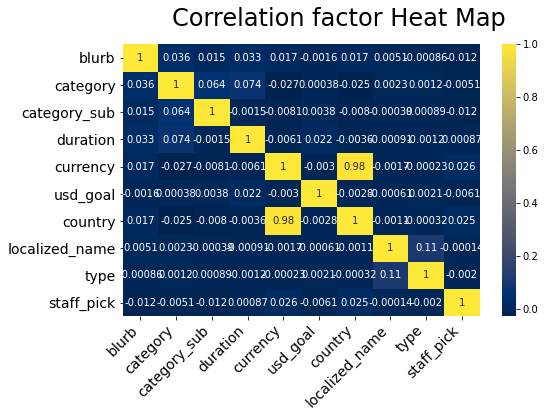

In [83]:
# plot heatmap

fig, ax = plt.subplots()
sns.heatmap(corr, xticklabels=feat.columns, yticklabels=feat.columns, annot=True,cmap='cividis')

fig.text(s="Correlation factor Heat Map",x=.5,y=0.95, fontsize = 24,ha='center', va='center')
plt.xticks(rotation=45, fontsize=14, ha='right')
plt.yticks(rotation=0, fontsize=14);

Due to the high correlation between country and currency, we decided not to use currency as a feature

In [29]:
features.pop(features.index('currency'));

## Train test split

In [30]:
# import
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [31]:
X = df[features]
y = df[target]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set: ', X_test.shape , y_test.shape)

Train set: (144498, 9) (144498, 1)
Test set:  (48166, 9) (48166, 1)


## Set up Random forrest classifier

Import necesarry modules 

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

Create Random forrest object and fit with train values. `values.ravel()` transforms the y_train into 1D array

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train.values.ravel());

Predict the target values for the test data

In [35]:
y_pred = rfc.predict(X_test)

Print the classifictaion report and the confusin matrix

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.77      0.71      0.74     18879
  successful       0.82      0.86      0.84     29287

    accuracy                           0.80     48166
   macro avg       0.80      0.79      0.79     48166
weighted avg       0.80      0.80      0.80     48166



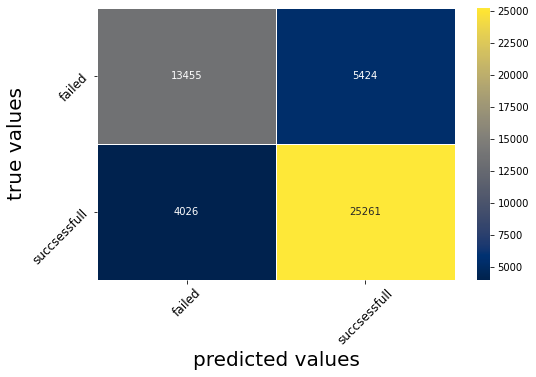

In [37]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);

### Take a look on feature importance

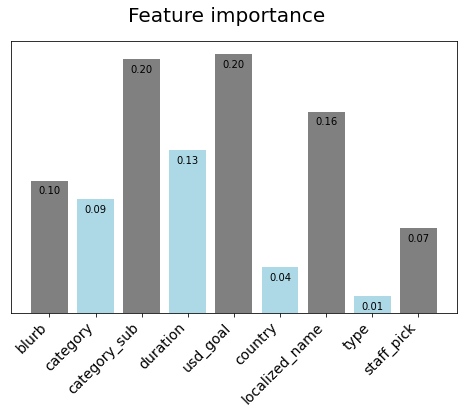

In [82]:
# calculate importance
importance = rfc.feature_importances_

# set axis, create figure
x_axis = list(range(len(importance)))
fig, ax = plt.subplots()

# plot figure
plt.bar(x_axis, importance, color=['grey','lightblue'])

# add Title
fig.text(s="Feature importance",x=.5,y=0.95, fontsize = 20,ha='center', va='center')

# edit xticks
plt.xticks(x_axis, features, rotation=45, fontsize=14, ha='right')
#plt.yticks(rotation=0, fontsize=14);
plt.yticks([])
# add value inside the bars
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')

## Setup KNN classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.values.ravel());

In [40]:
y_pred = knn.predict(X_test)

Print the classifictaion report and the confusin matrix

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.53      0.43      0.47     18879
  successful       0.67      0.75      0.71     29287

    accuracy                           0.63     48166
   macro avg       0.60      0.59      0.59     48166
weighted avg       0.62      0.63      0.62     48166



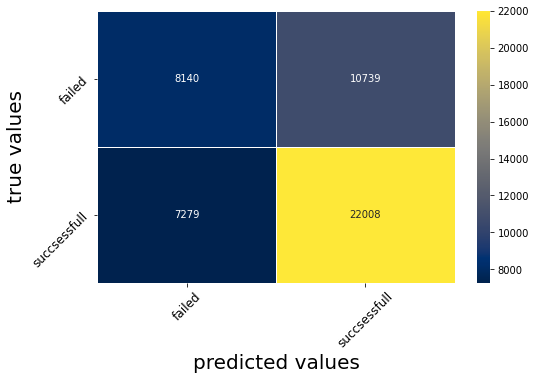

In [42]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);